<a href="https://colab.research.google.com/github/Anjali2023/covid-19-prediction/blob/main/2014566miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To obtain dataset from dropbox in zip form
!wget https://www.dropbox.com/s/ddpqnths8rqlip2/covid_19.zip?dl=0

--2021-06-13 02:11:19--  https://www.dropbox.com/s/ddpqnths8rqlip2/covid_19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ddpqnths8rqlip2/covid_19.zip [following]
--2021-06-13 02:11:19--  https://www.dropbox.com/s/raw/ddpqnths8rqlip2/covid_19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc436aa8c3dde46519f5f8dfed18.dl.dropboxusercontent.com/cd/0/inline/BQW8h10zZnsLMf7ppLGUdib8LW5SYjmyy3D2LVeIHd3Ql_uP92zIZzX32YTtI4u_mmijsfD5rUovXJctYchZXYo-RgG7erXk_5qoQE37gtS8mvd0-k92JE97dHKLEKhyGJWnmkj-28YFO4aHtnPyyN2B/file# [following]
--2021-06-13 02:11:20--  https://uc436aa8c3dde46519f5f8dfed18.dl.dropboxusercontent.com/cd/0/inline/BQW8h10zZnsLMf7ppLGUdib8LW5SYjmyy3D2LVeIHd3Ql_uP92zIZzX32YTtI4u_mmijsfD5rUovXJctYchZX

In [ ]:
#To unzip the data set
!unzip covid_19.zip?dl=0

Archive:  covid_19.zip?dl=0
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))#Conv2D is the layer to convolve the image into multiple images
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#we reduce the size of the feature map. Generally we create a pool size of 2x2 for max pooling. 
                                        #This enables us to reduce the size of the feature map while not losing important image information.
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())#Flattening involves transforming the entire pooled feature map matrix into a single column
model.add(Dense(64,activation='relu'))#Dense is used to make this a fully connected model and is the hidden layer.
model.add(Dropout(0.5))#Dropout is used to avoid overfitting on the dataset.
model.add(Dense(1,activation='sigmoid')) # output layer contains only one neuron which decide to which category image belongs.

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])# The adam optimizer adjusts the learning rate throughout training.
#‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [ ]:
#Image data augmentation is a technique that can be used to artificially expand the size of a training dataset 
#by creating modified versions of images in the dataset.
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,#//helps in in normalization[0,1]
    shear_range = 0.2,#tilt the image
    zoom_range = 0.2,#///allows us to make random crop along the images ,zoom in the image
    horizontal_flip = True,)
#//train generator of keras is used to ready data for the model
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
#The directory must be set to the path where your train dataset folders are present.
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    #The target_size is the size of your input images
    target_size = (224,224),
    #No. of images to be yielded from the generator per batch.
    batch_size = 32,
    #Set “binary” as you have only two classes to predict
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
#The directory must be set to the path where your val dataset folders are present.
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    #The target_size is the size of your input images
    target_size = (224,224),
    #No. of images to be yielded from the generator per batch.
    batch_size = 32,
    #Set “binary” as you have only two classes to predict
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
#fit_generator is used to fit the data into the model made above,
#other factors used are steps_per_epochs tells us about the number of times the model will execute for the training data.
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    #epochs tells us the number of times model will be trained in forward and backward pass.
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 76s 8s/step - loss: 0.8081 - accuracy: 0.6207 - val_loss: 0.6447 - val_accuracy: 0.8000
Epoch 2/10
7/7 [==============================] - 58s 8s/step - loss: 0.4682 - accuracy: 0.8156 - val_loss: 0.2694 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 58s 8s/step - loss: 0.3998 - accuracy: 0.8296 - val_loss: 0.3522 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 57s 8s/step - loss: 0.2097 - accuracy: 0.9163 - val_loss: 0.1312 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 58s 8s/step - loss: 0.2280 - accuracy: 0.9126 - val_loss: 0.1265 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 58s 8s/step - loss: 0.1729 - accuracy: 0.9336 - val_loss: 0.2330 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 57s 8s/step - loss: 0.1987 - accuracy: 0.9336 - val_loss: 0.0846 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [ ]:
model.save("model_adv.h5")
model.evaluate(train_generator)

7/7 [==============================] - 17s 2s/step - loss: 0.0854 - accuracy: 0.9777


[0.08535381406545639, 0.9776785969734192]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 4s 1s/step - loss: 0.0578 - accuracy: 1.0000


[0.05780523642897606, 1.0]

In [ ]:
#image.load_img:- load the image in PIL form
img=image.load_img( "/content/CovidDataset/Val/Normal/NORMAL2-IM-0416-0001-0001.jpeg",target_size=(224,224,3))
#img_to_array: Converts a PIL Image instance to a Numpy array
img=image.img_to_array(img)
  #The expand_dims() function is used to expand the shape of an array.
img=np.expand_dims(img,axis=0)
rslt=model.predict(img)
print(rslt)
if rslt[0] ==0:
  pred="Covid Positive"
else:
  pred="Normal"
print(pred)

[[1.]]
Normal


In [ ]:
model=load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
#os.listdir method in python is used to get the list of all files and directories in the specified directory. 
for i in os.listdir("/content/CovidDataset/Val/Normal/"):
  img=image.load_img("/content/CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  y_test.append(p[0])
  y_actual.append(1)


In [ ]:
for i in os.listdir("/content/CovidDataset/Val/Covid/"):
  img=image.load_img("/content/CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  y_test.append(p[0])
  y_actual.append(0)


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns#Seaborn is a library for making statistical graphics in Python. 

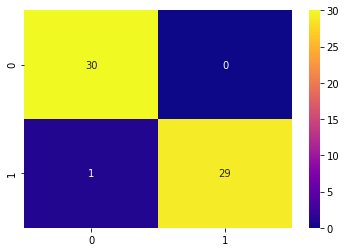

In [ ]:
sns.heatmap(cm,cmap="plasma",annot=True)#Matplotlib provides us with multiple colormaps
#The mapping from data values to color space. 
#If True, write the data value in each cell. 
#If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. 
